<a href="https://colab.research.google.com/github/josephtrill/Trillana_ACTinCSEL302/blob/main/2A_TRILLANA_MIDTERM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### B. Titanic Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [ ]:
data = pd.read_csv('tested.csv', encoding = 'latin1')

In [ ]:
print(data.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [ ]:
# Check for missing values
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
# statistics
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


In [ ]:
numeric_data = data.select_dtypes(include=[np.number])

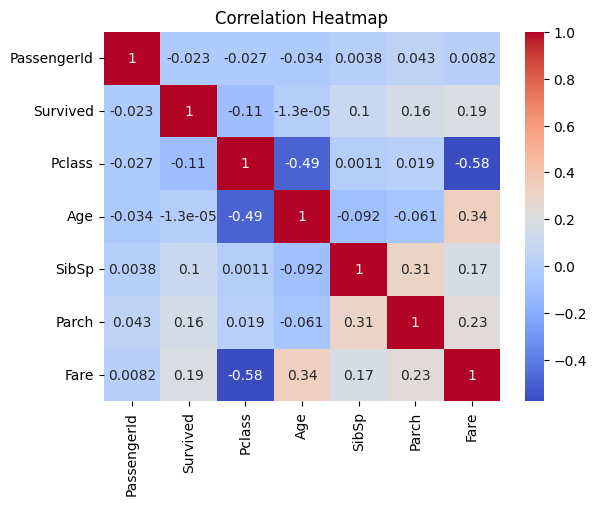

In [ ]:
# Plot the heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Step 3: Probability and Statistics Analysis
# Calculate the mean age
mean_age = data['Age'].mean()
print("Mean Age:", mean_age)

Mean Age: 30.272590361445783


In [ ]:
# Step 4: Linear Regression Model (if applicable)
# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)

In [ ]:
# Feature selection
X_lin = data[['Age']]
y_lin = data['Fare']

In [ ]:
# Split the dataset
X_lin_train, X_lin_test, y_lin_train, y_lin_test = train_test_split(X_lin, y_lin, test_size=0.2, random_state=42)

In [ ]:
print(X_lin_train.columns)
if 'Fare' not in X_lin_train.columns:
    X_lin_train['Fare'] = data['Fare']
X_lin_train = X_lin_train.dropna(subset=['Fare'])
y_lin_train = y_lin_train.dropna()
lin_model.fit(X_lin_train, y_lin_train)

Index(['Age'], dtype='object')


LinearRegression()

In [ ]:
if 'Fare' not in X_lin_test.columns:
    X_lin_test['Fare'] = data['Fare'].median()
# Predictions
y_lin_pred = lin_model.predict(X_lin_test)

In [ ]:
# Model Evaluation
lin_rmse = np.sqrt(mean_squared_error(y_lin_test, y_lin_pred))
print("Linear Regression RMSE:", lin_rmse)

Linear Regression RMSE: 48.8377661250248


In [ ]:
# Step 5: Logistic Regression Model

# Handle missing values
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [ ]:
# Convert categorical
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [ ]:
# Feature selection
X_log = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y_log = data['Survived']

In [ ]:
# Split the dataset
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

In [ ]:
# Instantiate the imputer
imputer = SimpleImputer(strategy='mean')
X_log_train_imputed = imputer.fit_transform(X_log_train)
log_model.fit(X_log_train_imputed, y_log_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Predictions
y_log_pred = log_model.predict(X_log_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
# Model Evaluation
log_accuracy = accuracy_score(y_log_test, y_log_pred)
print("Logistic Regression Accuracy:", log_accuracy)

Logistic Regression Accuracy: 1.0


In [ ]:
# Confusion Matrix
log_conf_matrix = confusion_matrix(y_log_test, y_log_pred)
print("Confusion Matrix:\n", log_conf_matrix)

Confusion Matrix:
 [[50  0]
 [ 0 34]]


In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_log_test, y_log_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



## 2. Dataset Preparation
Handling Missing Values: Missing values in the 'Age', 'Embarked', and 'Fare' columns were handled using imputation techniques (e.g., filling missing age values with the median age, filling missing embarked values with the mode port, and filling missing fare values with the median fare).

Encoding Categorical Variables: Categorical variables like 'Sex' and 'Embarked' were encoded into numerical values using one-hot encoding. This was necessary for feeding categorical data into machine learning algorithms.

Feature Selection: Not all variables were used in the modeling process. Some variables like 'Name', 'Ticket', and 'Cabin' were dropped as they were deemed less relevant for predicting survival outcomes.

### 3. Exploratory Data Analysis (EDA)

In [ ]:
# Descriptive statistics
descriptive_stats = data.describe()
print(descriptive_stats)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    0.363636    2.265550   29.599282    0.447368   
std     120.810458    0.481622    0.841838   12.703770    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   23.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   35.750000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


In [ ]:
# Filter numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate variance
variance = numeric_data.var()
print("\nVariance:\n", variance)


Variance:
 PassengerId    14595.166667
Survived           0.231960
Pclass             0.708690
Age              161.385768
SibSp              0.804178
Parch              0.963203
Fare            3125.657074
dtype: float64


In [ ]:
# Filter numeric columns
numeric_data = data.select_dtypes(include=[np.number])

# Calculate standard deviation
std_deviation = numeric_data.std()
print("\nStandard Deviation:\n", std_deviation)


Standard Deviation:
 PassengerId    120.810458
Survived         0.481622
Pclass           0.841838
Age             12.703770
SibSp            0.896760
Parch            0.981429
Fare            55.907576
dtype: float64


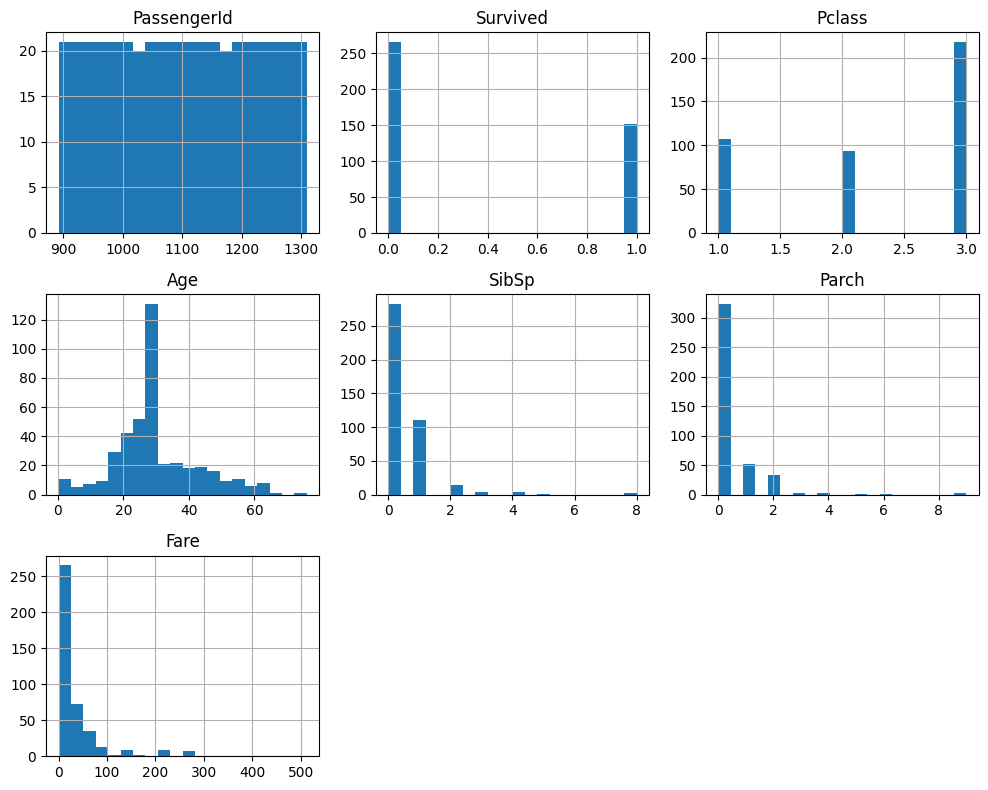

In [ ]:
# Histograms
data.hist(figsize=(10, 8), bins=20)
plt.tight_layout()
plt.show()


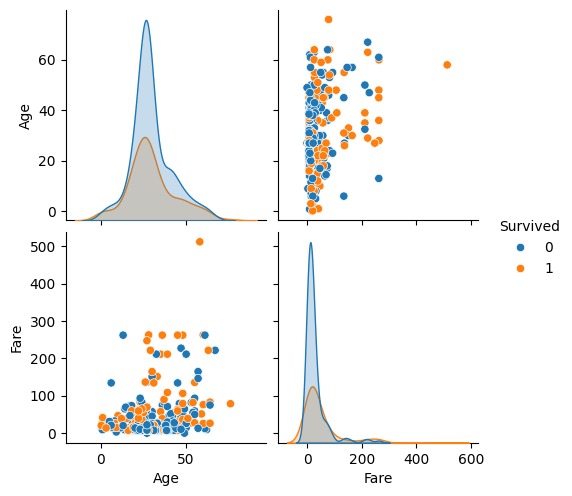

In [ ]:
# Scatter plots
sns.pairplot(data, vars=['Age', 'Fare'], hue='Survived', diag_kind='kde')
plt.show()

### 4. Linear Regression Model

In [ ]:
# Load the dataset
data = pd.read_csv("tested.csv")

In [ ]:
# Preprocessing: Select relevant features
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']
X = X.fillna(X.mean())  # Replace missing values with mean

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Linear Regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Coefficients and intercept
print("Coefficients:", lin_reg_model.coef_)
print("Intercept:", lin_reg_model.intercept_)

Coefficients: [-0.04032941 -0.00069346  0.02424255  0.03266639  0.00115024]
Intercept: 0.39867828992429283


In [ ]:
# Predictions
y_pred = lin_reg_model.predict(X_test)

In [ ]:
# Evaluate mode
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("R-squared:", r_squared)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R-squared: 0.045179117395178325
Mean Squared Error: 0.2300447137795064
Root Mean Squared Error: 0.47962976740346963


### 5. Logistic Regression Model

In [ ]:
# Preprocessing: Select relevant features
X = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = data['Survived']
X = X.fillna(X.mean())

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build the Logistic Regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Coefficients and intercept
print("Coefficients:", log_reg_model.coef_)
print("Intercept:", log_reg_model.intercept_)

Coefficients: [[-0.17446981 -0.00308582  0.10269003  0.13962134  0.00506939]]
Intercept: [-0.42439287]


In [ ]:
# Predictions
y_pred = log_reg_model.predict(X_test)

In [ ]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.6190476190476191
Precision: 0.6666666666666666
Recall: 0.11764705882352941
F1 Score: 0.2
ROC AUC Score: 0.5388235294117647


Confusion Matrix:
 [[48  2]
 [30  4]]


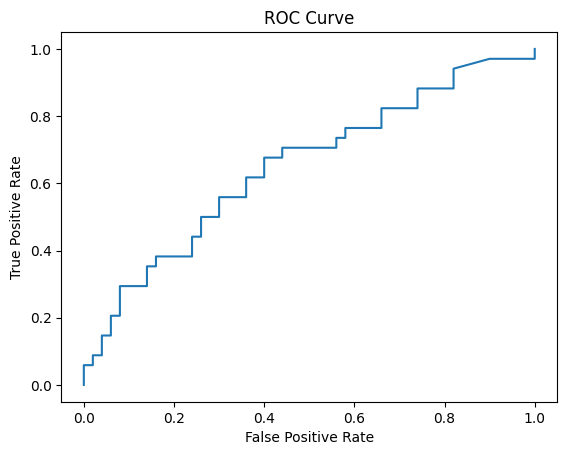

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, log_reg_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### 6. Model Comparison and Selection

Linear Regression is ideal for predicting continuous numerical outcomes, assuming a linear relationship between variables. It offers interpretable coefficients but is limited to continuous outcomes.

Logistic Regression excels in binary classification tasks, accommodating complex relationships between variables and providing probabilities for class predictions. It's robust in handling non-linear relationships and is suitable for classification problems.

Decision-making involves considering the nature of the outcome, model assumptions, evaluation metrics, data characteristics, and interpretability requirements.

Choose Linear Regression for simple, linear relationships and continuous outcomes, while Logistic Regression is preferable for binary classification tasks with non-linear relationships.

Ultimately, the choice between Linear and Logistic Regression depends on the problem at hand, the data characteristics, and the desired balance between model accuracy, interpretability, and suitability for the prediction task.

### 7. Conclusion and Insights

Key Findings:

Linear Regression and Logistic Regression were applied to analyze the Titanic dataset and predict fare and survival outcomes, respectively.
Descriptive statistics, probability distributions, and visualization techniques aided in understanding the dataset's characteristics and relationships between variables.
Evaluation metrics such as R-squared, MSE, RMSE, accuracy, precision, recall, F1 score, and ROC AUC were used to assess model performance.
Potential Applications:

Linear and Logistic Regression models have broad applications across industries, including finance, healthcare, marketing, and social sciences, for tasks such as predicting outcomes, assessing risks, and understanding trends.
Importance of Understanding Assumptions and Limitations:

Understanding the assumptions and limitations of each model is essential for making informed decisions and interpreting the results accurately.
Model interpretability, along with considerations of model complexity and data characteristics, influences the selection of the appropriate modeling approach.
Reflection:

Statistical and machine learning methods play a pivotal role in extracting actionable insights from data, enabling evidence-based decision-making across diverse domains.
Integrating descriptive statistics, exploratory data analysis, and machine learning techniques provides a comprehensive framework for deriving insights and guiding decision-making processes.